## 1. Read patient-data.csv

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('patient-data.csv')

## 2. Clean data

In [25]:
df_cleaned = df.dropna()

## 3, 4, 5. Iteratively train and evaluate the model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# 3. Encode the categorical target variable 'Ailment'
le = LabelEncoder()
y_ailment_clean = le.fit_transform(df_cleaned['Ailment'])

X = df_cleaned.drop('Ailment', axis=1)
y = y_ailment_clean
print(' y shape ', y.shape, ' type ', type(y))

unique_values, frequencies = np.unique(y, return_counts=True)

# Combine them into a dictionary or print side-by-side
print("Unique Values:", unique_values)
print("Frequencies:", frequencies)

# To view as a list of (value, frequency) tuples:
# result1 = list(zip(unique_values, frequencies))
# print("Value Counts (NumPy):", result1)

metrics = []
train_sizes = np.linspace(0.8, 0.2, 5)

for size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=42)

    scaler = StandardScaler()
    if True:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else: # to get nonstandard data for testing.
        X_train_scaled = X_train
        X_test_scaled = X_test


    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    metrics.append({'train_size': size, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1})


 y shape  (2367,)  type  <class 'numpy.ndarray'>
Unique Values: [0 1 2 3 4 5]
Frequencies: [621 539 556  20 508 123]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 6. Print the metrics

#### for standardized data we get following:
``` Different train size with metrics
 train_size  accuracy  precision    recall  f1_score
        0.80  0.993671   0.993754  0.993671  0.992336
        0.65  0.990350   0.990483  0.990350  0.986523
        0.50  0.990709   0.990813  0.990709  0.986805
        0.35  0.991553   0.983188  0.991553  0.987350
        0.20  0.992080   0.984255  0.992080  0.988144 

#### For Non-standardized data we get following:
    train_size  accuracy  precision    recall  f1_score
        0.80  0.474684   0.489199  0.474684  0.457701
        0.65  0.418577   0.438203  0.418577  0.400300
        0.50  0.416385   0.413560  0.416385  0.401388
        0.35  0.517219   0.523497  0.517219  0.508658
        0.20  0.376452   0.373237  0.376452  0.354419 

In [22]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

   train_size  accuracy  precision    recall  f1_score
0        0.80  0.474684   0.489199  0.474684  0.457701
1        0.65  0.418577   0.438203  0.418577  0.400300
2        0.50  0.416385   0.413560  0.416385  0.401388
3        0.35  0.517219   0.523497  0.517219  0.508658
4        0.20  0.376452   0.373237  0.376452  0.354419


## 7. Create a pair-wise correlation anlaysis of first 10 independent features.

In [55]:
feature_count = 26
correlation = X.iloc[:, :feature_count].corr()
min_val = 2.0
max_val = -2.0
n_rows = correlation.shape[0]
n_cols = correlation.shape[1]

print(correlation.shape)

for i in range(n_rows):
    row = correlation.iloc[i,:]
    for j in range(i+1,n_cols):
        if i==j:
            continue

        if (min_val > row.iloc[j]):
            min_row = i
            min_col = j
            min_val = row.iloc[j]

        if max_val < row.iloc[j]:
            max_row = i
            max_col = j
            max_val = row.iloc[j]


# print(correlation[:5][:5])
print(f' min_cor {min_val:.6f}', ' row = ', min_row, ', col = ', min_col)
print(f' max_cor {max_val:.6f}', ' row = ', max_row, ', col = ',max_col)

(24, 24)
 min_cor -0.295823  row =  1 , col =  8
 max_cor 0.359450  row =  0 , col =  11


## 8. Create Correlation heatmap of all independent features.

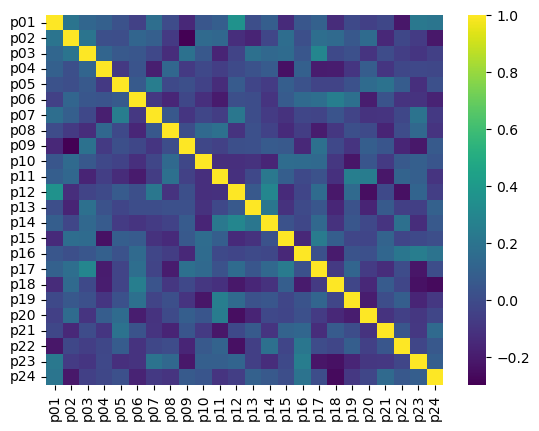

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
dataplot = sns.heatmap(X.iloc[:,:feature_count].corr(), cmap ="viridis")
plt.show()

### As we can see from the correlation table and correlation heatmap the features have weak correlation.

## 9. Perform Variance Inflation Factor analysis on all the independent features

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

## 10. Progressive VIF Analysis

Iteration 1: Removed feature 'p10' with VIF 868.6195
Metrics: Accuracy=0.9916, Precision=0.9917, Recall=0.9916, F1-score=0.9888

Iteration 2: Removed feature 'p03' with VIF 322.9765
Metrics: Accuracy=0.9916, Precision=0.9916, Recall=0.9916, F1-score=0.9888

Iteration 3: Removed feature 'p06' with VIF 269.3262
Metrics: Accuracy=0.9895, Precision=0.9790, Recall=0.9895, F1-score=0.9842



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Iteration 4: Removed feature 'p12' with VIF 264.4845
Metrics: Accuracy=0.9895, Precision=0.9791, Recall=0.9895, F1-score=0.9842

Iteration 5: Removed feature 'p09' with VIF 248.4639
Metrics: Accuracy=0.9515, Precision=0.9483, Recall=0.9515, F1-score=0.9473

Iteration 6: Removed feature 'p08' with VIF 197.8758
Metrics: Accuracy=0.7932, Precision=0.7880, Recall=0.7932, F1-score=0.7898



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Iteration 7: Removed feature 'p14' with VIF 186.5013
Metrics: Accuracy=0.8270, Precision=0.8190, Recall=0.8270, F1-score=0.8223

Iteration 8: Removed feature 'p07' with VIF 132.9820
Metrics: Accuracy=0.7700, Precision=0.7610, Recall=0.7700, F1-score=0.7648

Iteration 9: Removed feature 'p13' with VIF 109.1945
Metrics: Accuracy=0.7679, Precision=0.7631, Recall=0.7679, F1-score=0.7593

Iteration 10: Removed feature 'p16' with VIF 95.5334
Metrics: Accuracy=0.7046, Precision=0.7026, Recall=0.7046, F1-score=0.6925



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Iteration 11: Removed feature 'p02' with VIF 79.2566
Metrics: Accuracy=0.6983, Precision=0.6865, Recall=0.6983, F1-score=0.6869

Iteration 12: Removed feature 'p18' with VIF 57.8575
Metrics: Accuracy=0.6414, Precision=0.6314, Recall=0.6414, F1-score=0.6287



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packag

Iteration 13: Removed feature 'p21' with VIF 44.0783
Metrics: Accuracy=0.6287, Precision=0.6177, Recall=0.6287, F1-score=0.6143

Iteration 14: Removed feature 'p17' with VIF 36.8826
Metrics: Accuracy=0.6730, Precision=0.6732, Recall=0.6730, F1-score=0.6612

Iteration 15: Removed feature 'p01' with VIF 25.8389
Metrics: Accuracy=0.5380, Precision=0.5321, Recall=0.5380, F1-score=0.5263

Iteration 16: Removed feature 'p22' with VIF 25.5424
Metrics: Accuracy=0.5485, Precision=0.5413, Recall=0.5485, F1-score=0.5361



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packag

Iteration 17: Removed feature 'p05' with VIF 14.5170
Metrics: Accuracy=0.5042, Precision=0.4891, Recall=0.5042, F1-score=0.4855

Iteration 18: Removed feature 'p20' with VIF 10.4781
Metrics: Accuracy=0.5253, Precision=0.5039, Recall=0.5253, F1-score=0.5056

Iteration 19: Removed feature 'p11' with VIF 8.5284
Metrics: Accuracy=0.5253, Precision=0.5142, Recall=0.5253, F1-score=0.5059

Iteration 20: Removed feature 'p15' with VIF 7.7827
Metrics: Accuracy=0.5105, Precision=0.4931, Recall=0.5105, F1-score=0.4679

Iteration 21: Removed feature 'p04' with VIF 6.5776
Metrics: Accuracy=0.4388, Precision=0.3814, Recall=0.4388, F1-score=0.3924



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


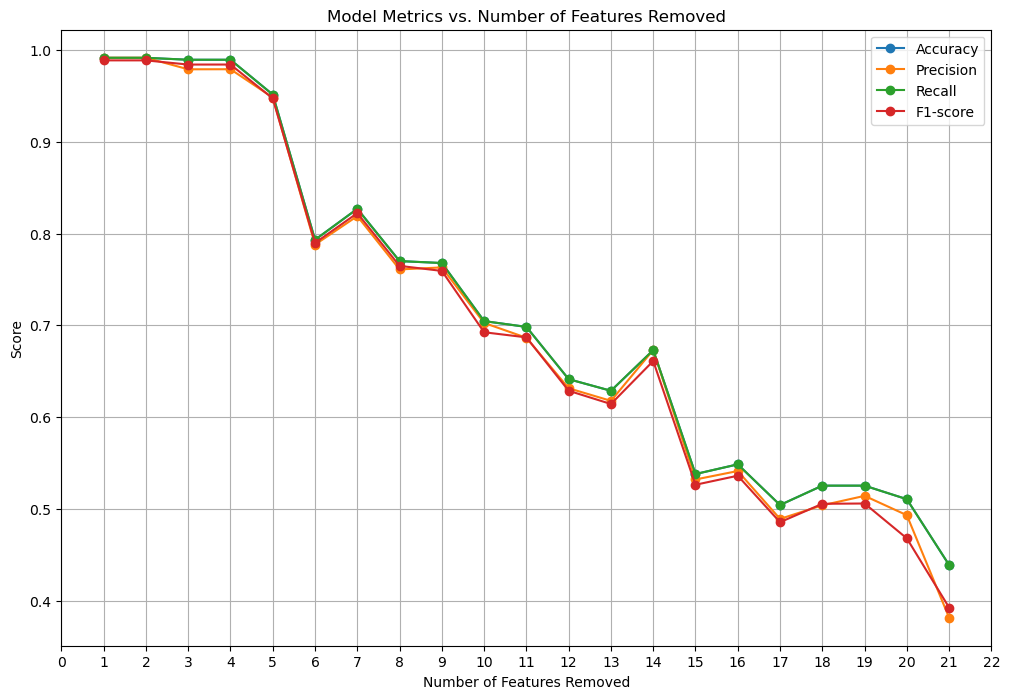

In [59]:
X_vif = X.copy()
vif_metrics = []
for i in range(len(X.columns) -1):
    vif = pd.DataFrame()
    vif["feature"] = X_vif.columns
    vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
    max_vif_feature = vif.loc[vif['VIF'].idxmax()]
    if max_vif_feature['VIF'] < 5:
        break
    X_vif = X_vif.drop(columns=[max_vif_feature["feature"]])
    X_train, X_test, y_train, y_test = train_test_split(X_vif, y, train_size=0.8, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    vif_metrics.append({'features_removed': i+1, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1})
    print(f"Iteration {i+1}: Removed feature '{max_vif_feature['feature']}' with VIF {max_vif_feature['VIF']:.4f}")
    print(f"Metrics: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}\n")

vif_metrics_df = pd.DataFrame(vif_metrics)
plt.figure(figsize=(12, 8))
plt.plot(vif_metrics_df['features_removed'], vif_metrics_df['accuracy'], marker='o', label='Accuracy')
plt.plot(vif_metrics_df['features_removed'], vif_metrics_df['precision'], marker='o', label='Precision')
plt.plot(vif_metrics_df['features_removed'], vif_metrics_df['recall'], marker='o', label='Recall')
plt.plot(vif_metrics_df['features_removed'], vif_metrics_df['f1_score'], marker='o', label='F1-score')
plt.xticks(np.arange(0,22.1, 1))
plt.xlabel('Number of Features Removed')
plt.ylabel('Score')
plt.title('Model Metrics vs. Number of Features Removed')
plt.legend()
plt.grid(True)
plt.show();